#Réglages Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
%cd /content/drive/My\ Drive/DL

/content/drive/My Drive/DL


In [2]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.1.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.1.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.1.0


In [3]:
!pip install tensorflow==2.1.0

  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl


In [4]:
!pip install keract

In [168]:
!pip install -q git+https://www.github.com/google/neural-tangents

In [0]:
%load_ext autoreload
%autoreload 2

#Importation des données

In [3]:
import time
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random 
import keract
from evaluation import evaluate, plot_confusion_matrix
from visualization import visualize_mitbih, plot_bar
from preprocessing_data import read_dataset, split_dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
np.random.seed(0)
random.seed(0)

In [0]:
def boldprint(s):
    print('\033[1m' + s + '\033[0m')

In [0]:
data_train,labels_train = read_dataset('mitbih_train.csv')
data_test,labels_test= read_dataset('mitbih_test.csv')

In [0]:
sorted_labels = ['Normal beat', 'Supraventricular ectopic beats','Ventricular ectopic beats', 'Fusion Beats', 'Unknown Beats']

#Visualisation des données

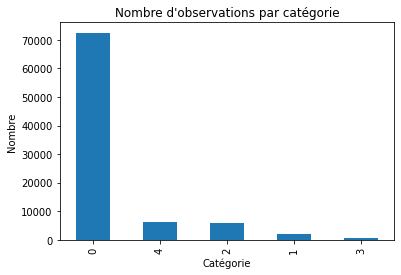

In [53]:
plot_bar(labels_train)

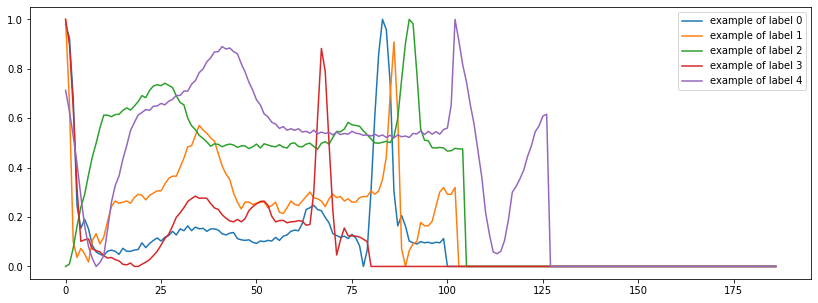

In [33]:
visualize_mitbih(data_train,labels_train)

### Benchmark avec des modèles Machine Learning

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy.sparse import vstack

In [0]:
xtrain,ytrain,xval,yval,xtest,ytest  = split_dataset(data_train,labels_train,data_test,labels_test,val_prop = 0.33, Deep = False, modele = 'ml')

Une rapide optimisation des modèles de Machine Learning "à la main et par expérimentation" dans la mesure où une gridsearch prendrait énormément de temps

In [0]:
classifiers = {'Logistic regression':LogisticRegression(C = 1, max_iter = 400, random_state=0),
               'SVM':SVC(C = 10,gamma = 0.1, random_state=0),
               'Random Forest': RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth = 300, min_samples_split = 500, random_state=0),
               'Multi Layer Perceptron':MLPClassifier(hidden_layer_sizes = (100,),activation = 'relu',solver = 'adam', learning_rate= 'constant',random_state=0)}

In [110]:
for name,clf in classifiers.items():
    clf.fit(xtrain,ytrain)
    ypred = clf.predict(xval)
    boldprint('--------------'+name+'--------------')
    print(evaluate(yval,ypred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--------------Logistic regression--------------
   accuracy    recall  precision  f1-score
0   0.91292  0.561031   0.788324  0.631771
--------------SVM--------------
   accuracy    recall  precision  f1-score
0  0.978195  0.829091   0.954028  0.880719
--------------Random Forest--------------
   accuracy    recall  precision  f1-score
0    0.9476  0.592486   0.769064  0.652461


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


--------------Multi Layer Perceptron--------------
   accuracy   recall  precision  f1-score
0  0.974561  0.86118    0.89621  0.877664


In [0]:
xtrain_ = vstack((xtrain, xval)) 
ytrain_ = np.concatenate((ytrain, yval))

Le code suivant permet d'apprécier les performances des modèles ML sur le set de test.

--------------Logistic regression--------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training time: 59.0s
                                precision    recall  f1-score   support

                   Normal beat       0.92      0.99      0.95     18118
Supraventricular ectopic beats       0.84      0.38      0.53       556
     Ventricular ectopic beats       0.65      0.33      0.44      1448
                  Fusion Beats       0.58      0.30      0.40       162
                 Unknown Beats       0.97      0.88      0.92      1608

                      accuracy                           0.91     21892
                     macro avg       0.79      0.58      0.65     21892
                  weighted avg       0.90      0.91      0.90     21892



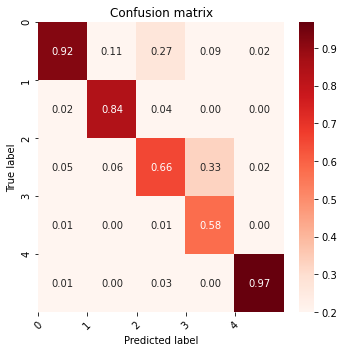

--------------SVM--------------
Training time: 406.0s
                                precision    recall  f1-score   support

                   Normal beat       0.98      1.00      0.99     18118
Supraventricular ectopic beats       0.96      0.61      0.75       556
     Ventricular ectopic beats       0.96      0.92      0.94      1448
                  Fusion Beats       0.82      0.58      0.68       162
                 Unknown Beats       0.99      0.97      0.98      1608

                      accuracy                           0.98     21892
                     macro avg       0.94      0.81      0.87     21892
                  weighted avg       0.98      0.98      0.98     21892



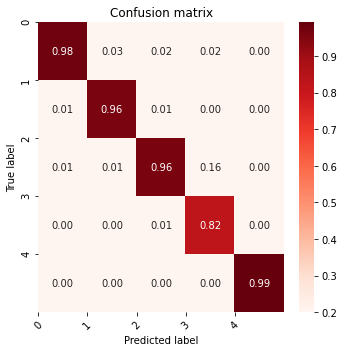

--------------Random Forest--------------
Training time: 684.5s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/content/drive/My Drive/DL/evaluation.py:34: RuntimeWarning: invalid value encountered in true_divide
  cm = np.round(cm/cm.sum(axis=0),3)


                                precision    recall  f1-score   support

                   Normal beat       0.94      1.00      0.97     18118
Supraventricular ectopic beats       0.97      0.39      0.55       556
     Ventricular ectopic beats       0.98      0.73      0.84      1448
                  Fusion Beats       0.00      0.00      0.00       162
                 Unknown Beats       1.00      0.87      0.93      1608

                      accuracy                           0.95     21892
                     macro avg       0.78      0.60      0.66     21892
                  weighted avg       0.94      0.95      0.94     21892



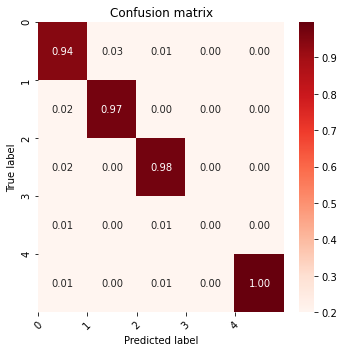

--------------Multi Layer Perceptron--------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time: 1184.9s
                                precision    recall  f1-score   support

                   Normal beat       0.98      1.00      0.99     18118
Supraventricular ectopic beats       0.86      0.67      0.76       556
     Ventricular ectopic beats       0.97      0.89      0.93      1448
                  Fusion Beats       0.78      0.73      0.76       162
                 Unknown Beats       0.99      0.97      0.98      1608

                      accuracy                           0.98     21892
                     macro avg       0.92      0.85      0.88     21892
                  weighted avg       0.98      0.98      0.97     21892



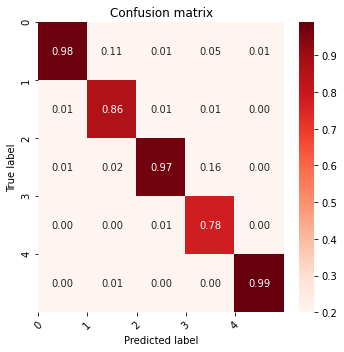

In [33]:
for name,clf in classifiers.items():
    boldprint('--------------'+name+'--------------')
    start = time.time()
    clf.fit(xtrain_,ytrain_)
    end = time.time()
    print(f'Training time: {end-start:.1f}s')
    ypred = clf.predict(xtest)
    print(classification_report(ytest,ypred,target_names = sorted_labels))
    plot_confusion_matrix(ytest,ypred, sorted_labels)

#Deep Learning

In [0]:
import numpy as np
import pandas as pd
import math
import warnings
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, BatchNormalization
from tensorflow.python.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, MaxPool1D
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.python.keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.python.keras.optimizers import Adam
from keras import regularizers
from sklearn.metrics import classification_report
from keras import backend as K
from training import train_deep_modele
from evaluation import evaluate, plot_confusion_matrix
from visualization import visualize_mitbih, plot_bar
from preprocessing_data import read_dataset, split_dataset
warnings.filterwarnings('ignore')

## Deep Learning simple

### CNN

In [0]:
xtrain,ytrain,xval,yval,xtest,ytest = split_dataset(data_train,labels_train,data_test,labels_test,val_prop = 0.45, Deep = True, modele = 'CNN')

In [10]:
model_CNN = Sequential()
im_shape=(xtrain.shape[1],1)
model_CNN.add(Conv1D(64, (3), input_shape=im_shape, activation='relu'))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='softmax'))
model_CNN.add(Dense(5, activation='softmax'))
model_CNN.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 185, 64)           256       
_________________________________________________________________
flatten (Flatten)            (None, 11840)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                757824    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 758,405
Trainable params: 758,405
Non-trainable params: 0
_________________________________________________________________


In [0]:
earlystopper = EarlyStopping(patience=4, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=2, verbose=1)
callbacks = [earlystopper, reduce_lr]

Train on 48154 samples, validate on 39400 samples
Epoch 1/20
48154/48154 [==============================] - 4s 78us/sample - loss: 1.0456 - accuracy: 0.8255 - val_loss: 0.8277 - val_accuracy: 0.8277
Epoch 2/20
48154/48154 [==============================] - 2s 41us/sample - loss: 0.7516 - accuracy: 0.8277 - val_loss: 0.7051 - val_accuracy: 0.8277
Epoch 3/20
48154/48154 [==============================] - 2s 39us/sample - loss: 0.6878 - accuracy: 0.8277 - val_loss: 0.6761 - val_accuracy: 0.8277
Epoch 4/20
48154/48154 [==============================] - 2s 37us/sample - loss: 0.6705 - accuracy: 0.8277 - val_loss: 0.6661 - val_accuracy: 0.8277
Epoch 5/20
48154/48154 [==============================] - 2s 37us/sample - loss: 0.6638 - accuracy: 0.8277 - val_loss: 0.6617 - val_accuracy: 0.8277
Epoch 6/20
48154/48154 [==============================] - 2s 39us/sample - loss: 0.6607 - accuracy: 0.8277 - val_loss: 0.6596 - val_accuracy: 0.8277
Epoch 7/20
48154/48154 [==============================] 

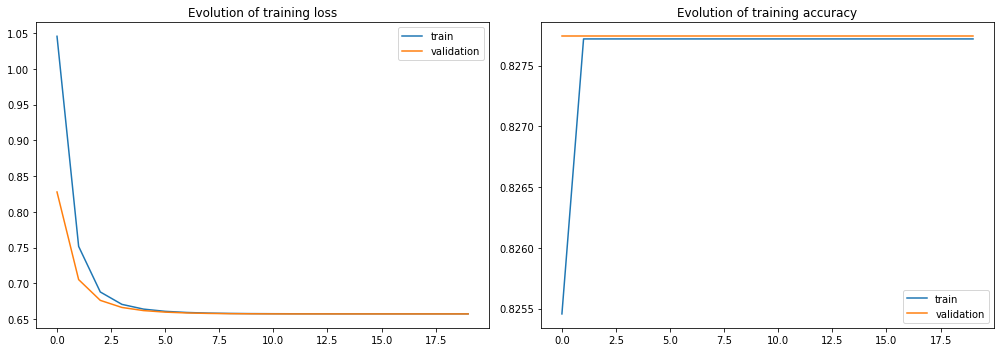

In [12]:
train_deep_modele(model_CNN, xtrain, ytrain, epochs = 20, callbacks = callbacks, batch_size = 128, val_data = (xval, yval))

   accuracy  recall  precision  f1-score
0  0.827608     0.2   0.165522  0.181135


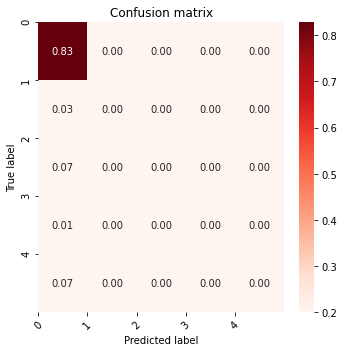

In [13]:
ypred = model_CNN.predict(xtest)
print(evaluate(ytest.argmax(axis=1), ypred.argmax(axis=1)))
plot_confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1), sorted_labels)

### RNN

In [0]:
xtrain,ytrain,xval,yval,xtest,ytest = split_dataset(data_train,labels_train,data_test,labels_test,val_prop = 0.45, Deep = True, modele = 'RNN')

In [21]:
n_most_common_words = 8000
emb_dim = 128
model_LSTM = Sequential()
model_LSTM.add(Embedding(n_most_common_words, emb_dim, input_length = xtrain.shape[1]))
model_LSTM.add(Dropout(0.3))
model_LSTM.add(LSTM(100))
model_LSTM.add(Dropout(0.3))
model_LSTM.add(Dense(5, activation='softmax'))
model_LSTM.compile(optimizer = 'adam' , loss='categorical_crossentropy', metrics=['accuracy'])
print(model_LSTM.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 128)          1024000   
_________________________________________________________________
dropout (Dropout)            (None, 250, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               91600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
Total params: 1,116,105
Trainable params: 1,116,105
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
earlystopper = EarlyStopping(patience=4, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=2, verbose=1)
callbacks = [earlystopper, reduce_lr]

In [0]:
train_deep_modele(model_LSTM, xtrain, ytrain, epochs = 10, callbacks = callbacks, batch_size = 128, val_data =  (xval, yval))

Train on 48154 samples, validate on 39400 samples
Epoch 1/10
 4480/48154 [=>............................] - ETA: 2:36 - loss: 0.8833 - accuracy: 0.8031

In [0]:
ypred = model_LSTM.predict(xtest)
evaluate(ytest.argmax(axis=1), ypred.argmax(axis=1))
plot_confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1),, sorted_labels)


## Deep Learning plus sophistiqué


ResNet

In [0]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from resnet import Classifier_RESNET

In [0]:
xtrain,ytrain,xval,yval,xtest,ytest = split_dataset(data_train,labels_train,data_test,labels_test,val_prop = 0.45, Deep = True, modele = 'CNN')

In [17]:
resnet = Classifier_RESNET(input_shape=(xtrain.shape[1],1), nb_classes=5,n_feature_maps = (50,100,100),kernel_size=(8,5,3,2), verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 187, 50)      450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 187, 50)      200         conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 187, 50)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

Train on 48154 samples, validate on 39400 samples
Epoch 1/5
48154/48154 [==============================] - 17s 358us/sample - loss: 0.2011 - accuracy: 0.9435 - val_loss: 2.0395 - val_accuracy: 0.0622
Epoch 2/5
48154/48154 [==============================] - 14s 282us/sample - loss: 0.1223 - accuracy: 0.9660 - val_loss: 0.1452 - val_accuracy: 0.9627
Epoch 3/5
48154/48154 [==============================] - 14s 286us/sample - loss: 0.0998 - accuracy: 0.9721 - val_loss: 0.3271 - val_accuracy: 0.8931
Epoch 4/5
48154/48154 [==============================] - 14s 286us/sample - loss: 0.0922 - accuracy: 0.9748 - val_loss: 0.2027 - val_accuracy: 0.9477
Epoch 5/5
48154/48154 [==============================] - 14s 281us/sample - loss: 0.0827 - accuracy: 0.9774 - val_loss: 0.1210 - val_accuracy: 0.9626


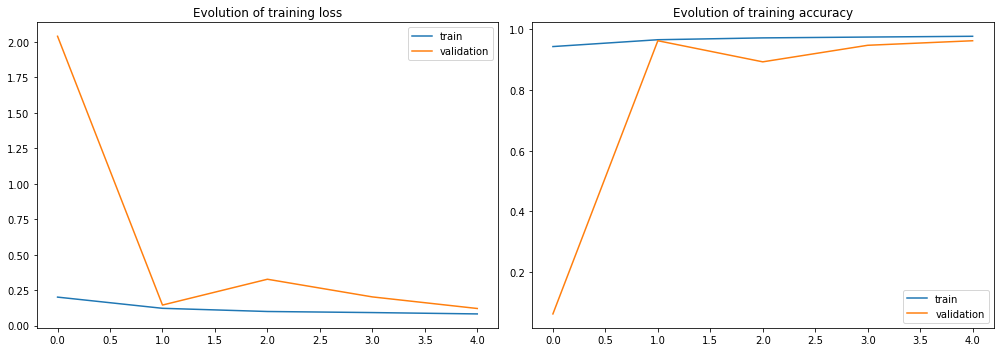

In [18]:
hist = train_deep_modele(resnet, xtrain, ytrain, epochs = 5, callbacks = callbacks, batch_size = 128, val_data = (xval, yval))

   accuracy    recall  precision  f1-score
0   0.96163  0.775346   0.928038  0.838427


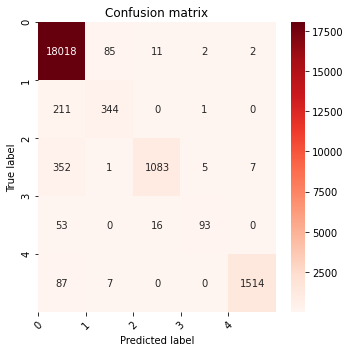

In [19]:
ypred = resnet.predict(xtest)
print(evaluate(ytest.argmax(axis=1), ypred.argmax(axis=1)))
plot_confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1))

## CNN  de l'aticle associé (https://arxiv.org/pdf/1805.00794.pdf)

In [0]:
xtrain,ytrain,xval,yval,xtest,ytest = split_dataset(data_train,labels_train,data_test,labels_test,val_prop = 0.45, Deep = True,modele = 'CNN')

In [388]:
model_ART = Sequential()
im_shape=(xtrain.shape[1],1)

model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(MaxPool1D(pool_size=(5), strides=(2)))

model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(MaxPool1D(pool_size=(5), strides=(2)))

model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(MaxPool1D(pool_size=(5), strides=(2)))

model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(MaxPool1D(pool_size=(5), strides=(2)))

model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(Conv1D(32, (5), input_shape=im_shape, strides=1, padding= 'same', activation ="relu"))
model_ART.add(MaxPool1D(pool_size=(5), strides=(2)))

model_ART.add(Flatten())

model_ART.add(Dense(32, activation='relu'))
model_ART.add(Dense(32, activation='relu'))
model_ART.add(Dense(5, activation='softmax'))

model_ART.compile(optimizer= tensorflow.keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999), loss='categorical_crossentropy', metrics = ['accuracy'])
model_ART.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_462 (Conv1D)          (None, 187, 32)           192       
_________________________________________________________________
conv1d_463 (Conv1D)          (None, 187, 32)           5152      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 92, 32)            0         
_________________________________________________________________
conv1d_464 (Conv1D)          (None, 92, 32)            5152      
_________________________________________________________________
conv1d_465 (Conv1D)          (None, 92, 32)            5152      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 44, 32)            0         
_________________________________________________________________
conv1d_466 (Conv1D)          (None, 44, 32)          

In [0]:
batch_size = 500
n_obs = xtrain.shape[0]
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size) 
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

lrate = LearningRateScheduler(exp_decay)
earlystopper = EarlyStopping(patience=4, verbose=1)
callbacks = [lrate,earlystopper]

Train on 48154 samples, validate on 39400 samples
Epoch 1/20
48154/48154 [==============================] - 4s 83us/sample - loss: 0.4049 - accuracy: 0.8839 - val_loss: 0.2110 - val_accuracy: 0.9381
Epoch 2/20
48154/48154 [==============================] - 3s 63us/sample - loss: 0.1863 - accuracy: 0.9474 - val_loss: 0.1663 - val_accuracy: 0.9524
Epoch 3/20
48154/48154 [==============================] - 3s 63us/sample - loss: 0.1480 - accuracy: 0.9579 - val_loss: 0.1468 - val_accuracy: 0.9597
Epoch 4/20
48154/48154 [==============================] - 3s 64us/sample - loss: 0.1216 - accuracy: 0.9670 - val_loss: 0.1258 - val_accuracy: 0.9667
Epoch 5/20
48154/48154 [==============================] - 3s 64us/sample - loss: 0.1051 - accuracy: 0.9705 - val_loss: 0.0990 - val_accuracy: 0.9738
Epoch 6/20
48154/48154 [==============================] - 3s 64us/sample - loss: 0.0910 - accuracy: 0.9753 - val_loss: 0.0897 - val_accuracy: 0.9759
Epoch 7/20
48154/48154 [==============================] 

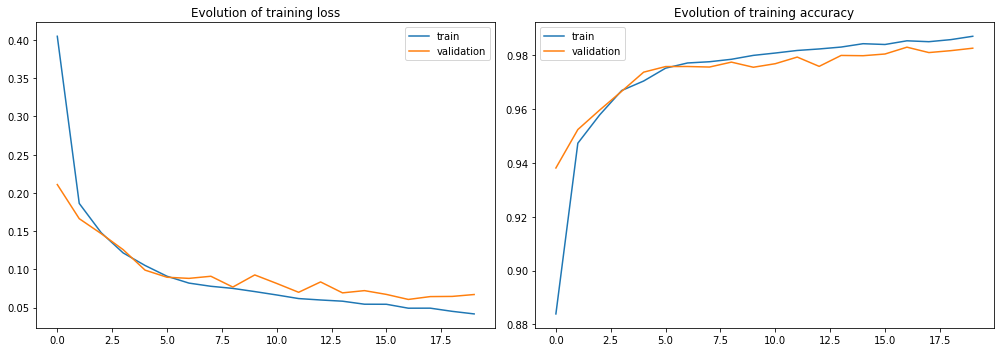

In [390]:
train_deep_modele(model_ART, xtrain, ytrain, epochs = 20, callbacks = callbacks, batch_size = 128, val_data = (xval, yval))

   accuracy    recall  precision  f1-score
0  0.981317  0.864392    0.93667  0.896205


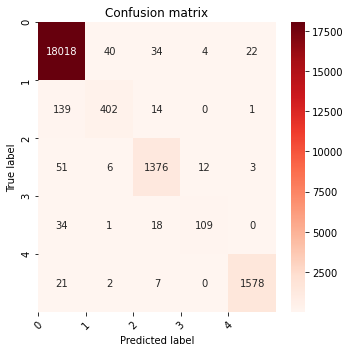

In [158]:
ypred = model_ART.predict(xtest)
print(evaluate(ytest.argmax(axis=1), ypred.argmax(axis=1)))
plot_confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1))

## Interprétabilité des activation layers

In [0]:
import keract
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from visualization import display_conv_activations

In [0]:
ypred = np.argmax(model_ART.predict(xtest),axis=1)
not_normal = []
for i in range(len(ypred)):
    if not ypred[i]==0: 
        not_normal.append(i)

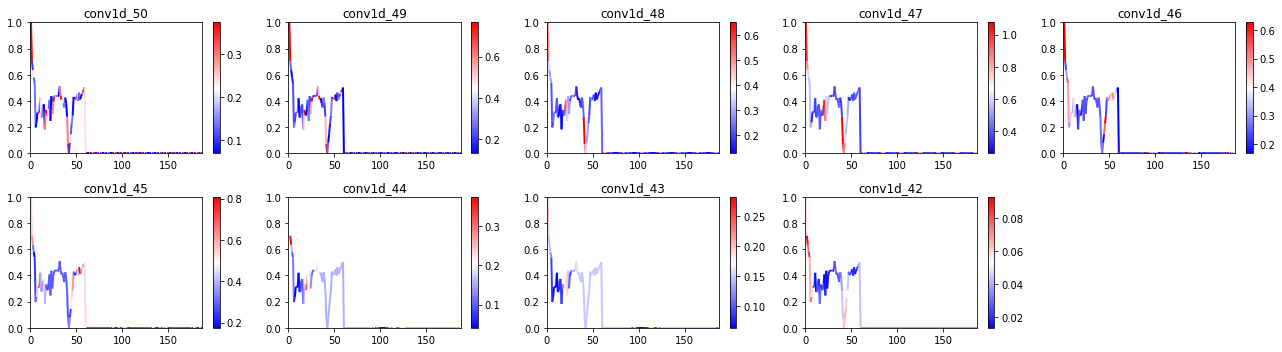

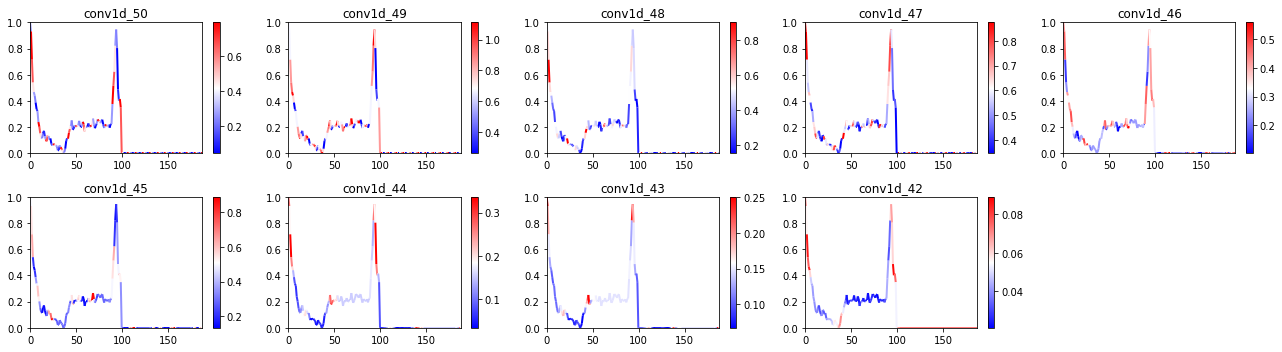

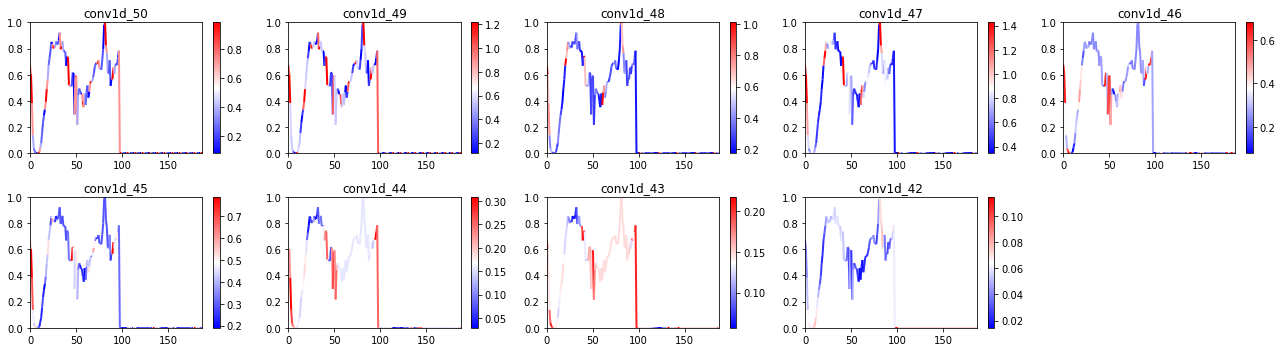

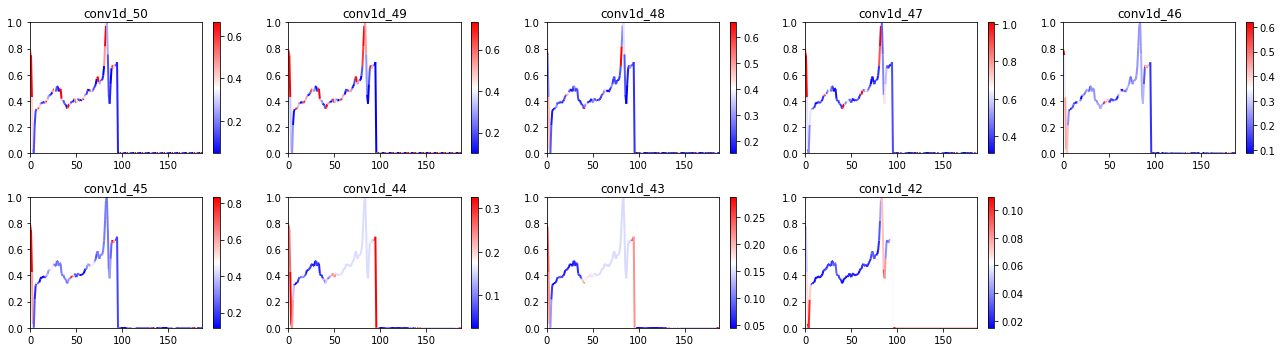

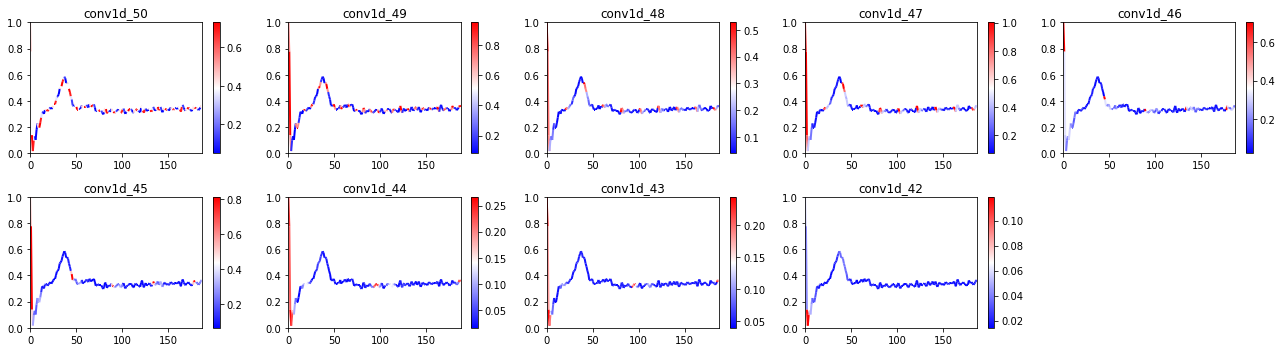

In [165]:
display_conv_activations(model_ART,xtest[not_normal[0]])
display_conv_activations(model_ART,xtest[not_normal[1]])
display_conv_activations(model_ART,xtest[not_normal[2]])
display_conv_activations(model_ART,xtest[not_normal[3]])
display_conv_activations(model_ART,xtest[not_normal[4]])

### NTK

In [0]:
import neural_tangents as nt
from neural_tangents import stax
import numpy as np
import jax

In [0]:
xtrain,ytrain,xval,yval,xtest,ytest = split_dataset(data_train,labels_train,data_test,labels_test,val_prop = 0.45, Deep = True,modele = 'NTK')

In [0]:
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(512), stax.Relu(),
    stax.Dense(512), stax.Relu(),
    stax.Dense(512), stax.Relu(),
    stax.Dense(5)
)

In [0]:
nngp_mean, nngp_covariance = nt.predict.gp_inference(
    kernel_fn, xtrain, ytrain, xval, 
    diag_reg=1e-4, get='nngp', compute_cov=True)

In [0]:
nngp_std = np.sqrt(np.diag(nngp_covariance))
ypred = nngp_mean.argmax(axis = 1)

In [0]:
evaluate(yval,ypred)
plot_confusion_matrix(yval,ypred)

In [0]:
rcParams['figure.figsize'] = 12,8
sns.heatmap(
            nngp_mean[yval.argsort(),:],
            xticklabels=1,
            yticklabels=False,
            cmap=sns.color_palette("YlOrRd", 100)
           )

In [0]:
from collections import defaultdict
dic = defaultdict(list)
dic_mean = defaultdict(list)
for i, _ in enumerate(y_test):
    it = str(yval[i])+','+str(ypred[i])
    if it in dic.keys():
        dic[it] += [nngp_std[i]]
    else:
        dic[it] = [nngp_std[i]]

heat_var = np.ones([5,5])*0.006
for k in dic.keys():
    i = int(list(k)[0])
    j = int(list(k)[2])
    heat_var[i,j] = np.mean(dic[k])

In [0]:
rcParams['figure.figsize'] = 12,8
sns.heatmap(heat_var, cmap=sns.color_palette("RdBu_r",12), annot = confusion_matrix(yval,ypred)/len(yval))